In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [81]:
salarios = pd.read_csv(r"Arquivo_Salarios_Colaboradores_2021.csv", sep=";")
salarios.head()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,1,8000.80,25,4,11,1,1,1,0,79.38
1,2,8500.17,24,5,11,0,0,1,0,84.13
2,3,3350.59,22,1,12,0,0,0,0,46.15
3,4,9500.24,28,4,14,1,0,0,1,83.85
4,5,1500.63,18,2,12,0,0,0,1,73.64


In [82]:
salarios.shape

(180, 10)

In [83]:
# análise inicial dos dados
salarios.describe().round(2)

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.0,180.00
mean,90.50,8539.49,31.07,9.07,12.58,1.27,0.28,0.55,0.5,71.74
std,52.11,4729.51,9.35,5.61,2.57,1.22,0.45,0.50,0.5,15.99
min,1.00,1500.63,18.00,1.00,7.00,0.00,0.00,0.00,0.0,34.48
25%,45.75,5491.23,24.00,5.00,11.00,1.00,0.00,0.00,0.0,60.41
50%,90.50,7551.12,28.00,7.00,13.00,1.00,0.00,1.00,0.5,72.08
75%,135.25,10584.68,36.00,13.00,14.00,1.00,1.00,1.00,1.0,83.85
max,180.00,25329.91,65.00,25.00,19.00,7.00,1.00,1.00,1.0,98.96


In [84]:
# vrificação das colunas
salarios.columns

Index(['Ordem', 'salario', 'idade', 'tempocasa', 'escolar', 'qproj_estra',
       'proj_sustent', 'proj_6sigma', 'proj_social', 'notaavalia'],
      dtype='object')

In [85]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(salarios.isnull().sum(),
            salarios.isnull().sum()/len(salarios)), 
            columns=['Count', 'Proportion'], 
            index=salarios.columns)

,Count,Proportion
Ordem,0,0.0
salario,0,0.0
idade,0,0.0
tempocasa,0,0.0
escolar,0,0.0
qproj_estra,0,0.0
proj_sustent,0,0.0
proj_6sigma,0,0.0
proj_social,0,0.0
notaavalia,0,0.0


In [86]:
salarios.nunique()

Ordem           180
salario         179
idade            37
tempocasa        24
escolar          13
qproj_estra       8
proj_sustent      2
proj_6sigma       2
proj_social       2
notaavalia      141
dtype: int64

In [87]:
# avaliando a variável quantidade de projetos
salarios[salarios.qproj_estra > 1]

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
13,14,16284.13,47,7,14,2,0,1,1,66.15
14,15,18120.84,65,9,14,2,0,1,1,76.56
17,18,13063.14,35,10,13,2,0,1,0,76.77
18,19,13844.19,54,15,11,4,0,1,1,61.98
19,20,14232.19,44,8,13,4,0,1,1,67.92
32,33,14500.65,24,6,16,2,0,1,1,84.13
40,41,9750.49,28,4,12,2,0,1,1,85.10
41,42,9750.51,28,6,12,2,0,1,1,75.10
42,43,8000.36,27,4,12,3,0,1,1,70.10
43,44,8100.44,27,6,12,3,0,1,1,70.10


In [88]:
salarios.drop("Ordem", axis=1, inplace=True)

In [89]:
salarios.head()

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,8000.80,25,4,11,1,1,1,0,79.38
1,8500.17,24,5,11,0,0,1,0,84.13
2,3350.59,22,1,12,0,0,0,0,46.15
3,9500.24,28,4,14,1,0,0,1,83.85
4,1500.63,18,2,12,0,0,0,1,73.64


In [90]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salario       180 non-null    float64
 1   idade         180 non-null    int64  
 2   tempocasa     180 non-null    int64  
 3   escolar       180 non-null    int64  
 4   qproj_estra   180 non-null    int64  
 5   proj_sustent  180 non-null    int64  
 6   proj_6sigma   180 non-null    int64  
 7   proj_social   180 non-null    int64  
 8   notaavalia    180 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 12.8 KB


Após análise inicial dos dados, verificamos que as informações estão de acordo para dar prosseguimento na criação do modelo.
Avaliamos dados missing, tipos de dados e se havia algum valor não condizente em alguma coluna.
Agora vamos continuar a análise com alguns gráficos para avaliar distribuição e outliers.

Text(0.5, 1.0, 'Histograma Salarios')

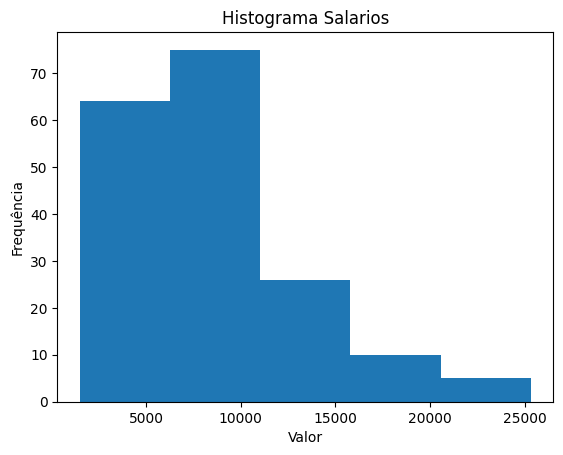

In [91]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar

plt.hist(salarios['salario'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Salarios')

Text(0, 0.5, 'Ocorrência')

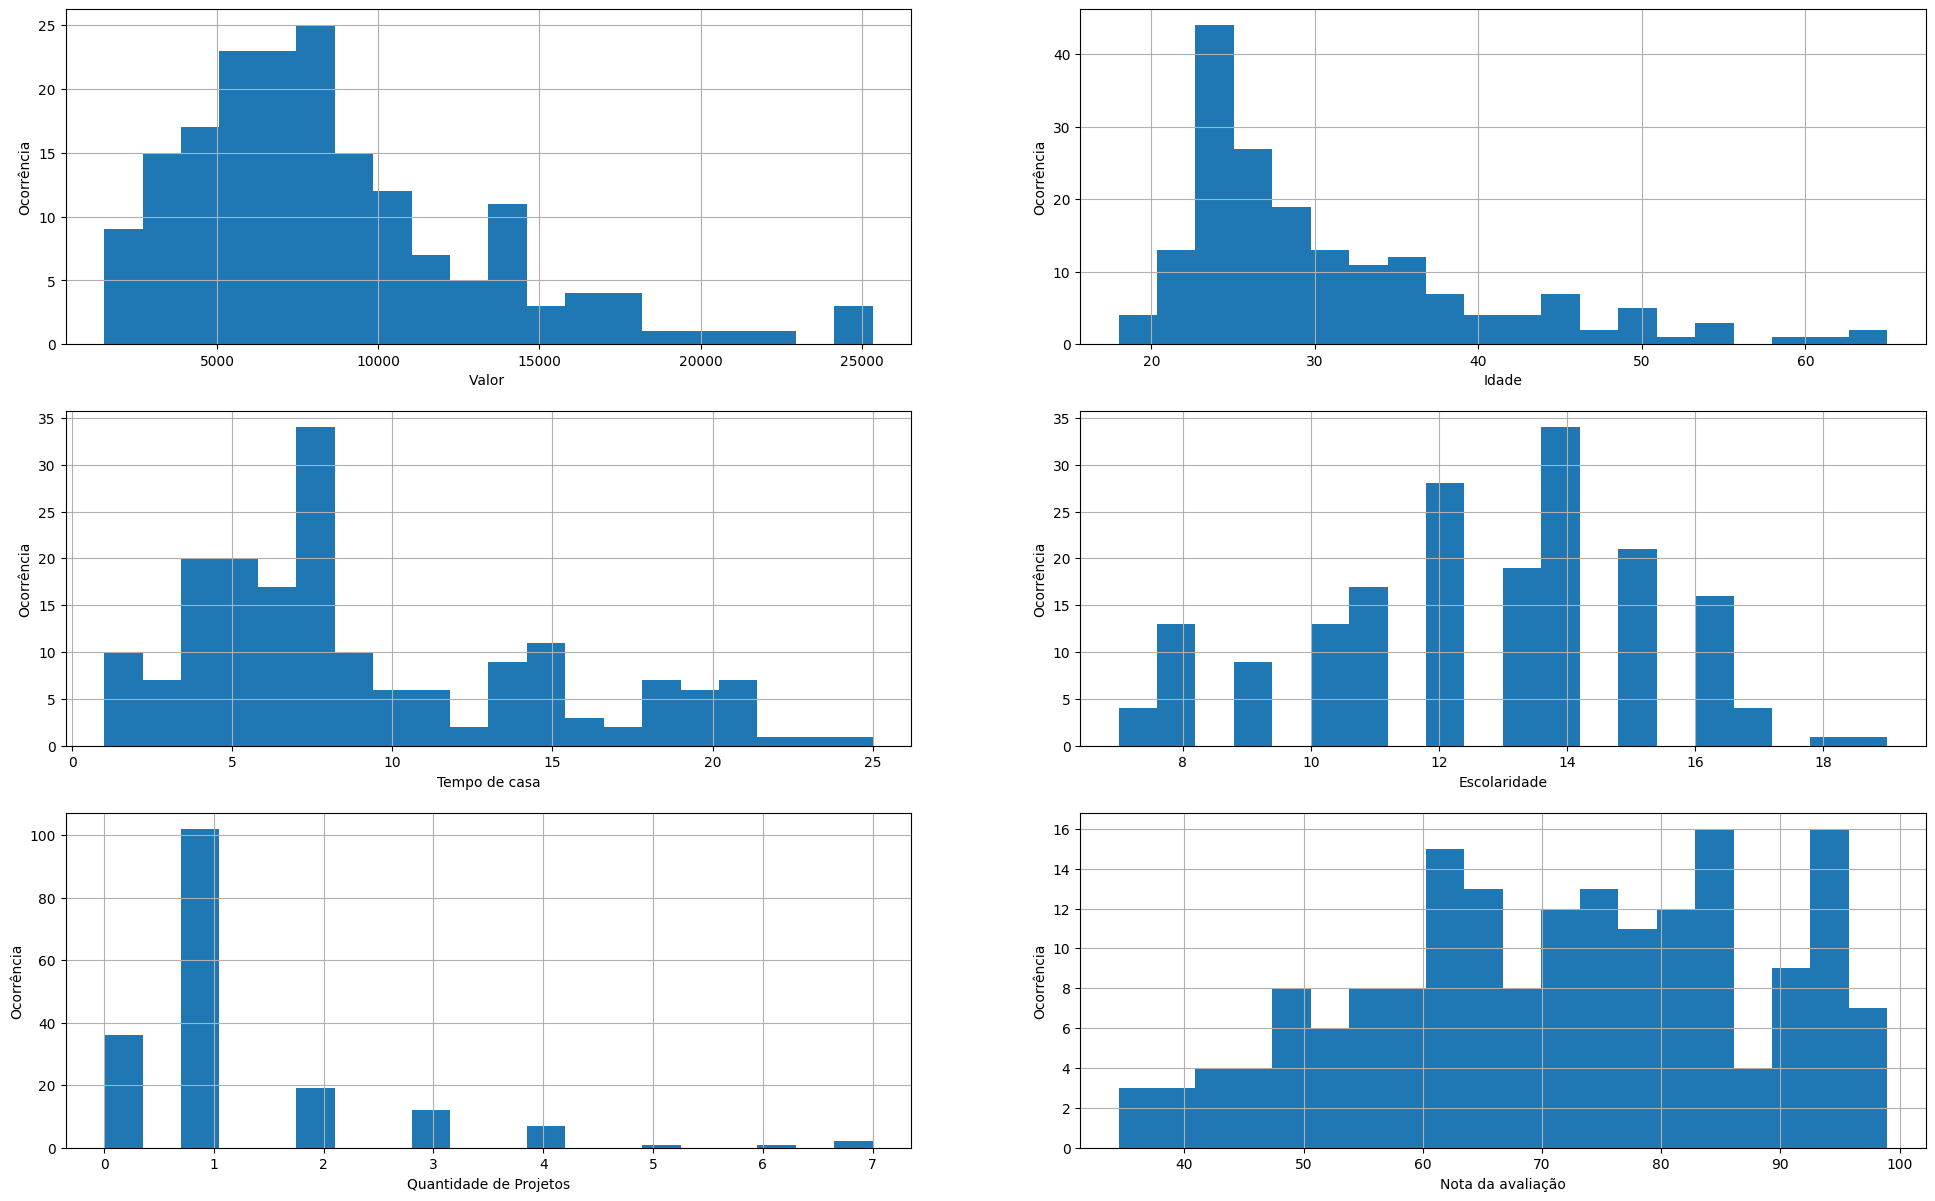

In [92]:
# avaliando a distribuicaoo de cada variavel numérica 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = salarios.salario.hist(bins=20)
fig.set_xlabel('Valor ')
fig.set_ylabel('Ocorrência')

plt.subplot(4, 2, 2)
fig = salarios.idade.hist(bins=20)
fig.set_xlabel('Idade')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 3)
fig = salarios.tempocasa.hist(bins=20)
fig.set_xlabel('Tempo de casa')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 4)
fig = salarios.escolar.hist(bins=20)
fig.set_xlabel('Escolaridade')
fig.set_ylabel('Ocorrência')


plt.subplot(4, 2, 5)
fig = salarios.qproj_estra.hist(bins=20)
fig.set_xlabel('Quantidade de Projetos')
fig.set_ylabel('Ocorrência')

plt.subplot(4, 2, 6)
fig = salarios.notaavalia.hist(bins=20)
fig.set_xlabel('Nota da avaliação')
fig.set_ylabel('Ocorrência')


Text(0, 0.5, 'Nota da avaliação')

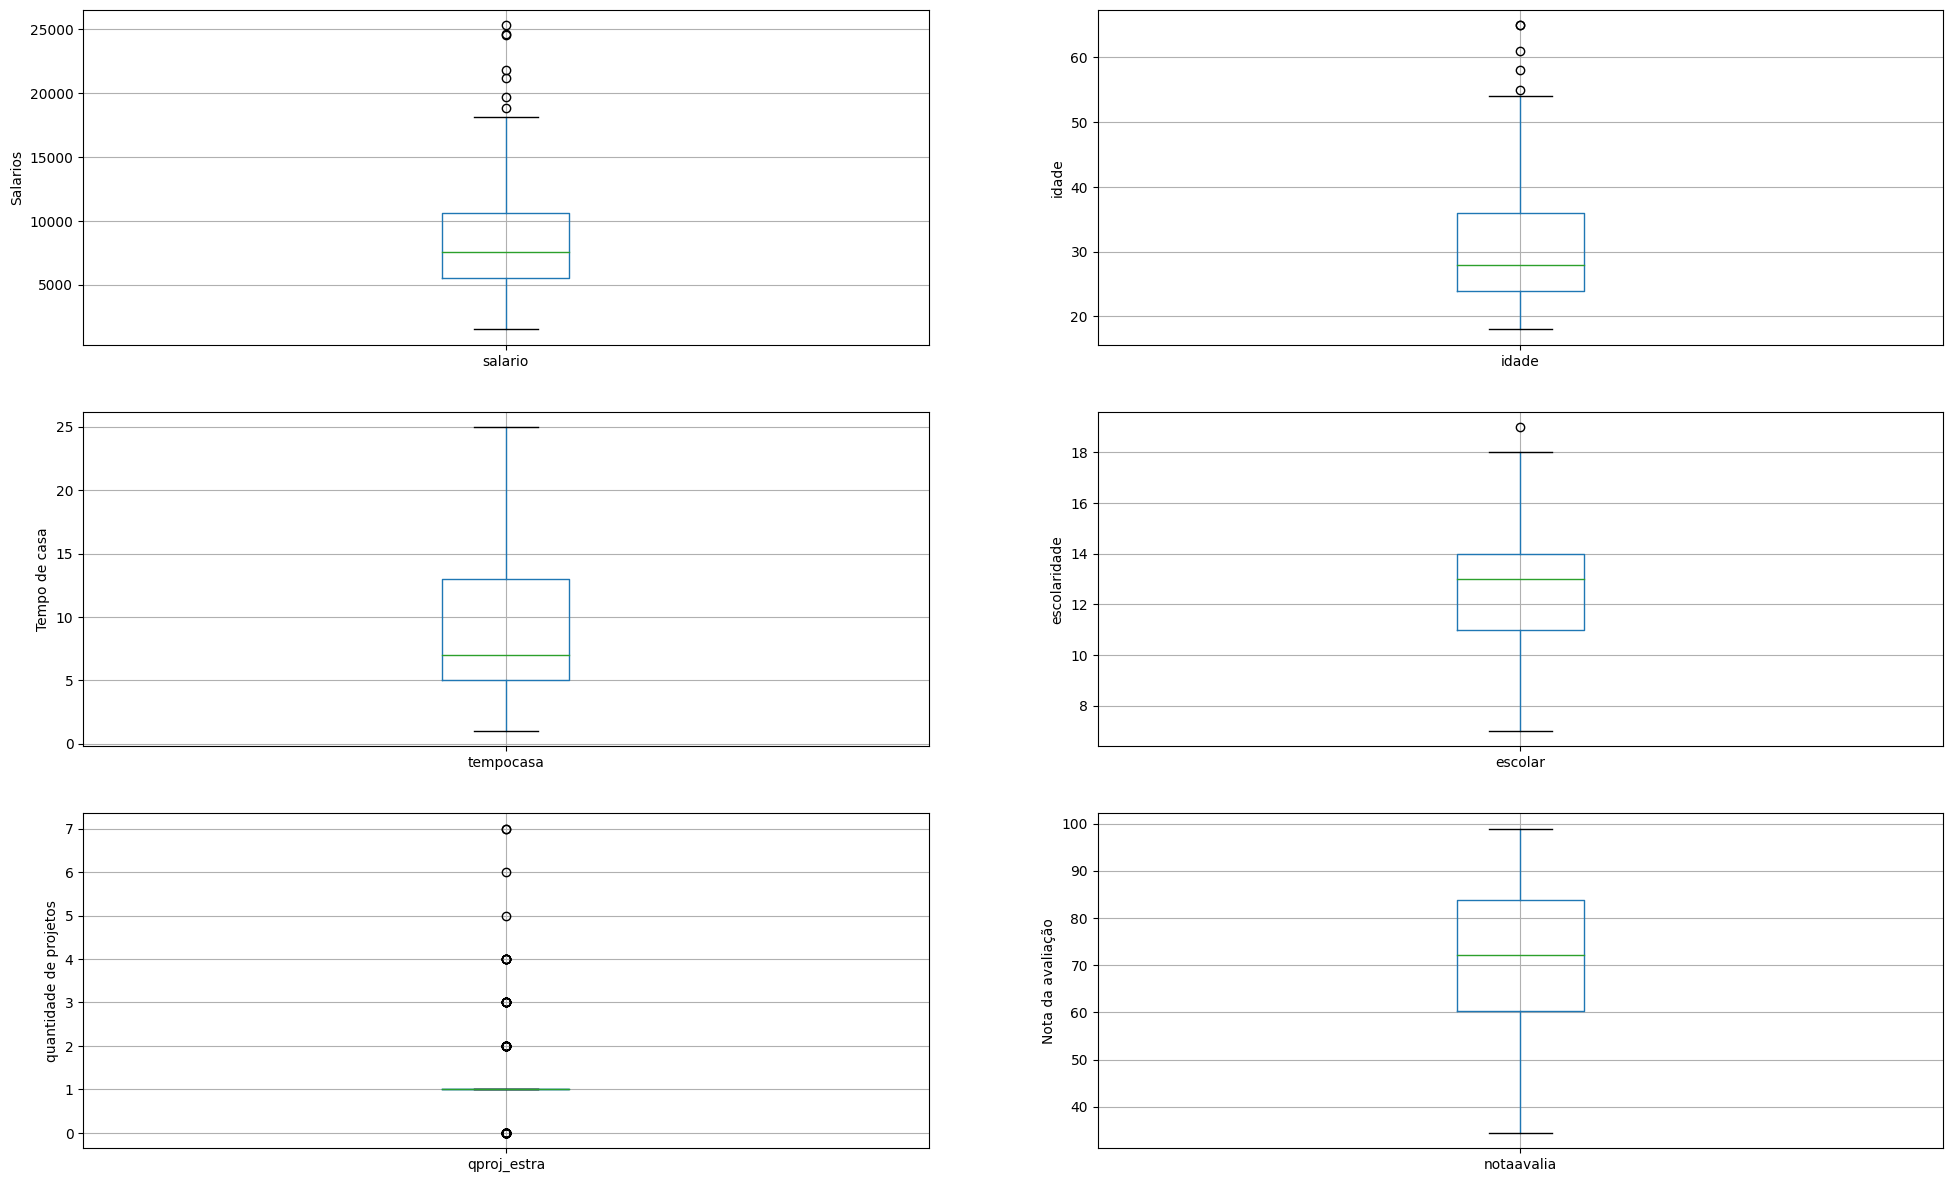

In [93]:
# Outra opção para variáveis quantitativas Boxplot: para visualizar Outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = salarios.boxplot(column='salario', )
fig.set_title('')
fig.set_ylabel('Salarios')


plt.subplot(4, 2, 2)
fig = salarios.boxplot(column='idade')
fig.set_title('')
fig.set_ylabel('idade')


plt.subplot(4, 2, 3)
fig = salarios.boxplot(column='tempocasa')
fig.set_title('')
fig.set_ylabel('Tempo de casa')

plt.subplot(4, 2, 4)
fig = salarios.boxplot(column='escolar')
fig.set_title('')
fig.set_ylabel('escolaridade')

plt.subplot(4, 2, 5)
fig = salarios.boxplot(column='qproj_estra')
fig.set_title('')
fig.set_ylabel('quantidade de projetos')

plt.subplot(4, 2, 6)
fig = salarios.boxplot(column='notaavalia')
fig.set_title('')
fig.set_ylabel('Nota da avaliação')

In [94]:
# avaliando os outliers de salario
salarios[salarios.salario > 20000]

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
108,24660.55,58,20,17,6,0,1,1,98.96
109,21192.16,61,12,16,7,0,1,1,82.86
161,25329.91,51,21,17,2,0,1,0,63.03
162,24567.23,46,16,15,2,1,1,0,63.44
164,21775.67,50,15,15,7,1,1,1,94.39


In [95]:
# avaliando os outliers de salario
salarios[salarios.escolar > 18]

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
133,9974.07,27,9,19,3,0,1,1,74.07


Não há sentido em retirar os outliers pois fazem parte da estatística da empresa como um todo, tanto em salarios, quanto em idade.
O boxplot de quantidade de projeto fica pouco visível devido a grande maioria dos colaboradores atuarem em um projeto somente.

In [96]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

salarios.corr().round(2)

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
salario,1.00,0.60,0.33,0.49,0.52,-0.02,0.36,0.24,0.08
idade,0.60,1.00,0.21,0.30,0.49,-0.10,0.16,-0.00,0.04
tempocasa,0.33,0.21,1.00,-0.06,0.09,-0.04,0.12,-0.03,0.07
escolar,0.49,0.30,-0.06,1.00,0.30,-0.10,0.15,0.18,-0.06
qproj_estra,0.52,0.49,0.09,0.30,1.00,-0.06,0.25,0.26,0.09
proj_sustent,-0.02,-0.10,-0.04,-0.10,-0.06,1.00,-0.06,0.25,0.05
proj_6sigma,0.36,0.16,0.12,0.15,0.25,-0.06,1.00,0.06,0.07
proj_social,0.24,-0.00,-0.03,0.18,0.26,0.25,0.06,1.00,0.12
notaavalia,0.08,0.04,0.07,-0.06,0.09,0.05,0.07,0.12,1.00


In [100]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
corr = salarios.corr(method='pearson')
corr

,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
salario,1.000000,0.600277,0.332923,0.492168,0.518249,-0.017883,0.359549,0.237473,0.078258
idade,0.600277,1.000000,0.212797,0.299943,0.488883,-0.103279,0.161561,-0.000596,0.039255
tempocasa,0.332923,0.212797,1.000000,-0.058369,0.087035,-0.039051,0.115490,-0.032775,0.069828
escolar,0.492168,0.299943,-0.058369,1.000000,0.297009,-0.102464,0.153629,0.175625,-0.059922
qproj_estra,0.518249,0.488883,0.087035,0.297009,1.000000,-0.057288,0.248645,0.260660,0.093075
proj_sustent,-0.017883,-0.103279,-0.039051,-0.102464,-0.057288,1.000000,-0.062330,0.248069,0.051128
proj_6sigma,0.359549,0.161561,0.115490,0.153629,0.248645,-0.062330,1.000000,0.055835,0.069299
proj_social,0.237473,-0.000596,-0.032775,0.175625,0.260660,0.248069,0.055835,1.000000,0.115789
notaavalia,0.078258,0.039255,0.069828,-0.059922,0.093075,0.051128,0.069299,0.115789,1.000000


Text(0.5, 1.0, 'Correlação entre diferentes variáveis')

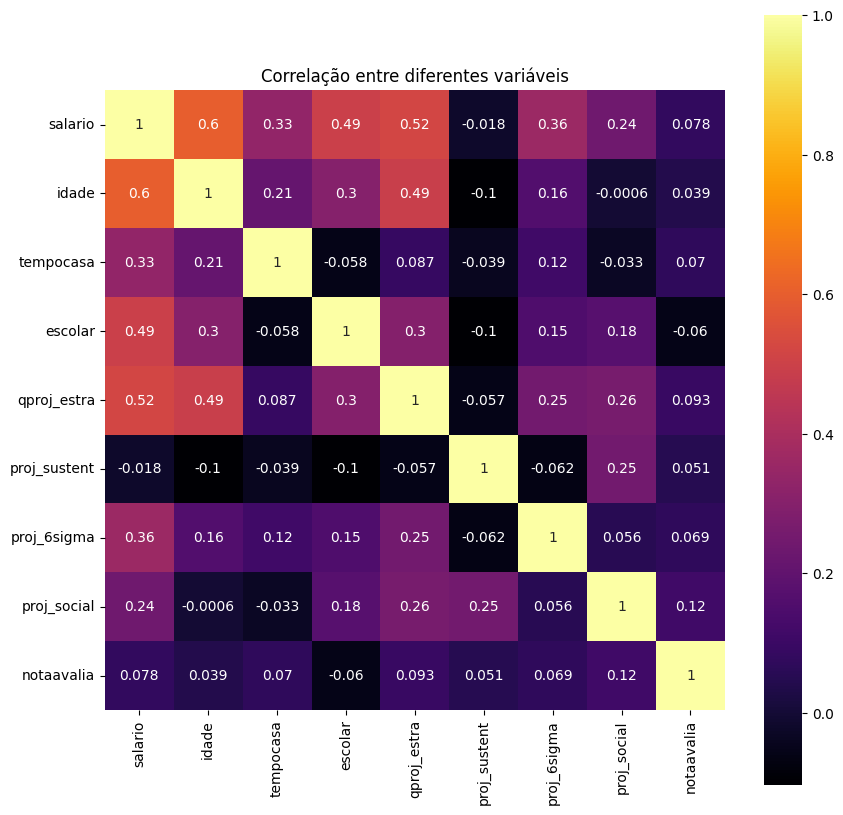

In [99]:
correlation = salarios.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='inferno')

plt.title('Correlação entre diferentes variáveis')

Podemos observar que há uma correlação moderada entre salarios, idade e quantidade de projetos em atuação.

Text(0.5, 1.0, ' Scatter plot Salarios vs Idade')

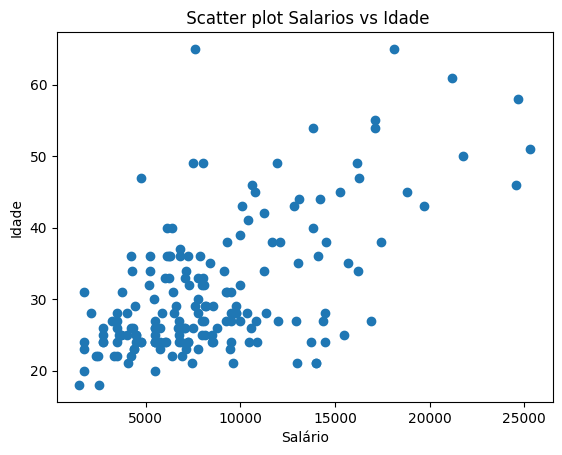

In [101]:
# Gráfico de dispersão ou scatterplot
plt.scatter('salario', 'idade', data=salarios)
plt.xlabel("Salário")
plt.ylabel("Idade")
plt.title(" Scatter plot Salarios vs Idade")

Text(0.5, 1.0, ' Scatter plot Salarios vs Quantidade de projetos')

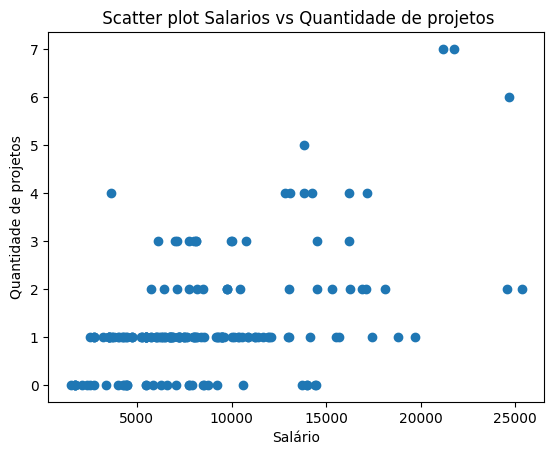

In [102]:
# Gráfico de dispersão ou scatterplot
plt.scatter('salario', 'qproj_estra', data=salarios)
plt.xlabel("Salário")
plt.ylabel("Quantidade de projetos")
plt.title(" Scatter plot Salarios vs Quantidade de projetos")

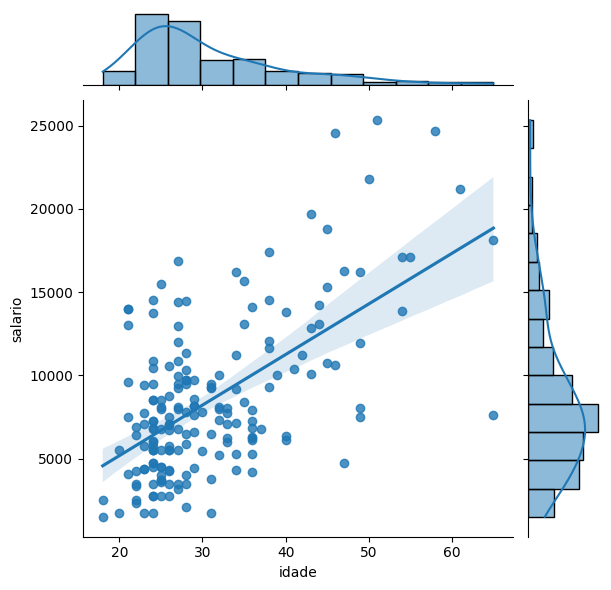

In [103]:
# Gráfico de dispersão 
sb.jointplot(x='idade', y='salario', data=salarios, kind='reg')

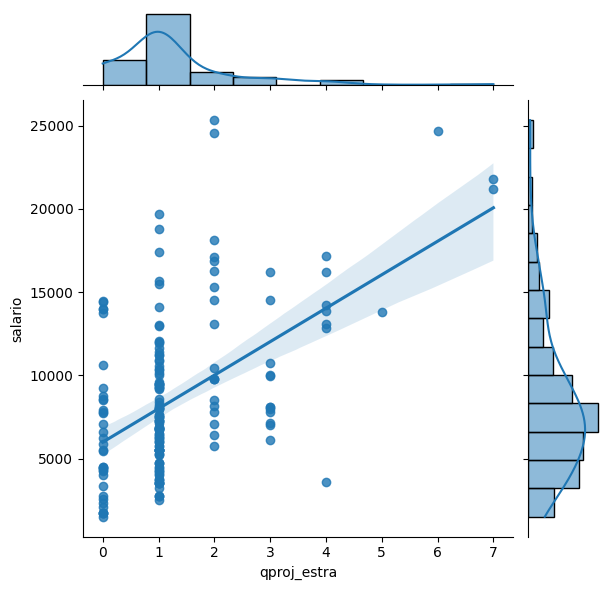

In [104]:
# Gráfico de dispersão 
sb.jointplot(x='qproj_estra', y='salario', data=salarios, kind='reg')

Text(0.5, 4.585069444444395, 'Quantidade de Projetos')

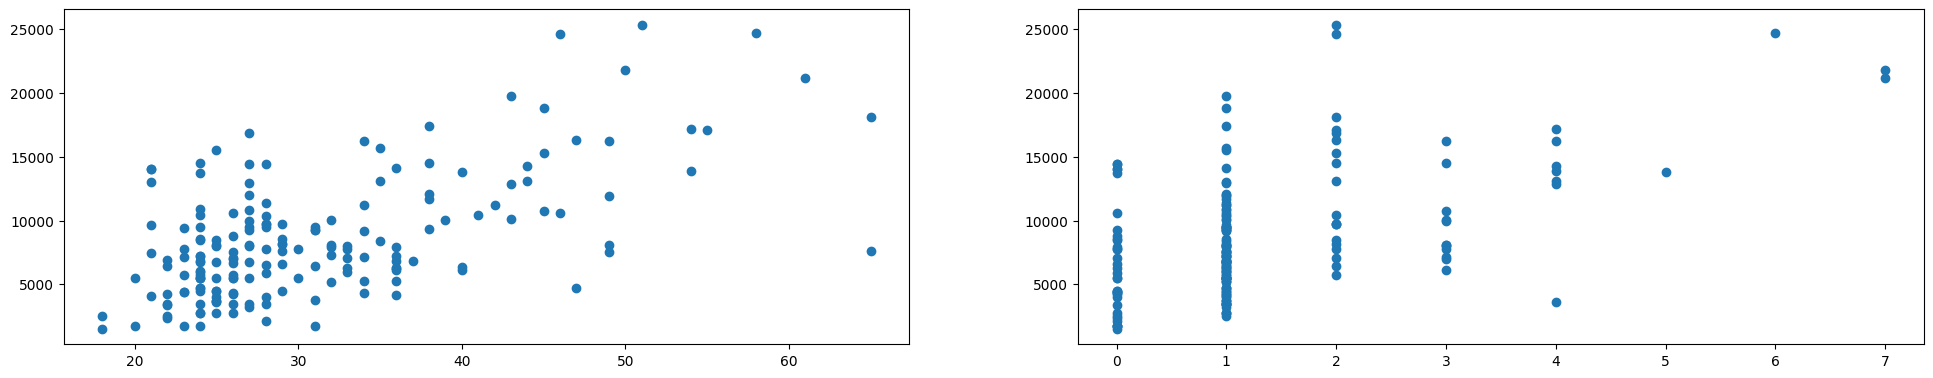

In [105]:
# Variáveis Preditoras/Independentes quantitativas com a variável Target


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)

plt.scatter(salarios.idade, salarios.salario, marker='o');
fig.set_title('Analise')
fig.set_ylabel('Salario')
fig.set_xlabel('Idade')

plt.subplot(4, 2, 2)

plt.scatter(salarios.qproj_estra, salarios.salario, marker='o');
fig.set_title('Analise')
fig.set_ylabel('Salario')
fig.set_xlabel('Quantidade de Projetos')